# LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# PREPROCESSING

## Read data

In [2]:
df = pd.read_csv('Mall_Customers.csv',sep=',')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


---

## Explore data

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


- The columns in the dataset are `customer id`, `gender`, `age`, `income` and `spending score`.

In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- There is no missing values in the dataset.

I dropped the `CustomerID` column as that does not seem relevant to the context. 

In [6]:
df.drop(['CustomerID'], axis=1,inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Discover data

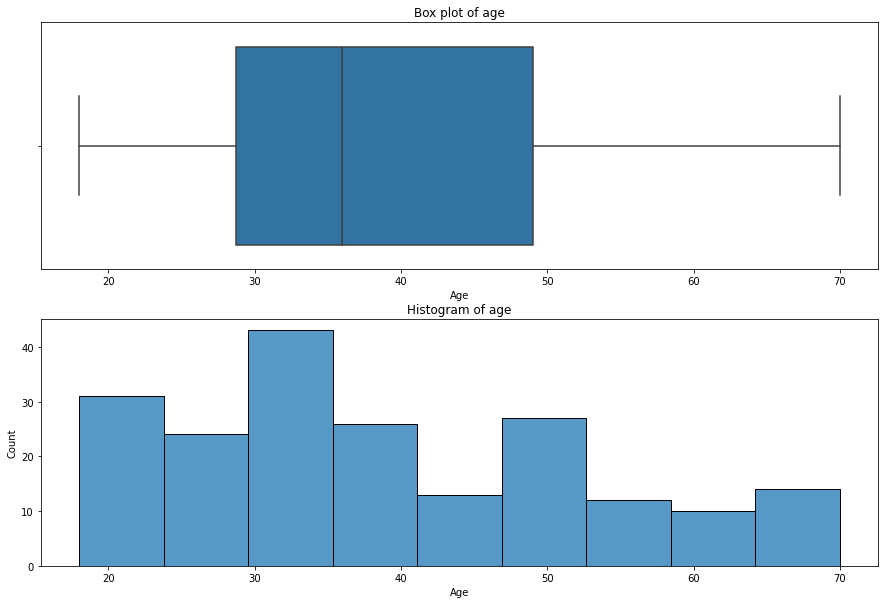

In [7]:
figure1, axis1 = plt.subplots(2, 1,figsize=(15,10))
sns.boxplot(x='Age',data=df,ax=axis1[0])
sns.histplot(x='Age',data=df,ax=axis1[1])
axis1[0].set_title('Box plot of age')
axis1[1].set_title('Histogram of age')
plt.show()

- As we can see in 2 graph above, there are some information about `Age` column: 
    + The average age of the customers in the data is about 39.
    + Age in range from 30 to 50 account for a large quantity in the data.

Next, I visualize `Spending Score (1-100)` and `Annual Income (k$)` to better visualize the distribution range. 

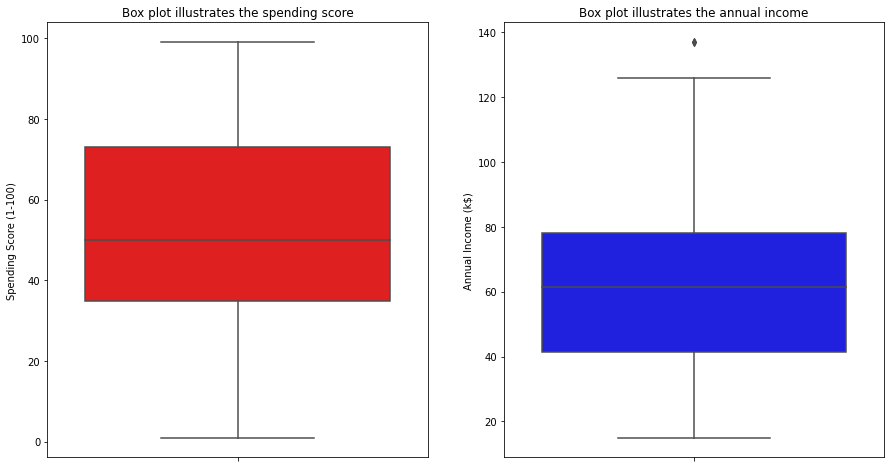

In [8]:
figure2, axis2 = plt.subplots(1, 2, figsize=(15,8))

sns.boxplot(y="Spending Score (1-100)", data=df, color='red', ax=axis2[0])
sns.boxplot(y="Annual Income (k$)", data=df, color='blue', ax=axis2[1])

axis2[0].set_title('Box plot illustrates the spending score')
axis2[1].set_title('Box plot illustrates the annual income')
plt.show()

- The range of spending score is clearly more than the annual income range.
- In Annual Income, it has outlier in class high income(about 140 k$)

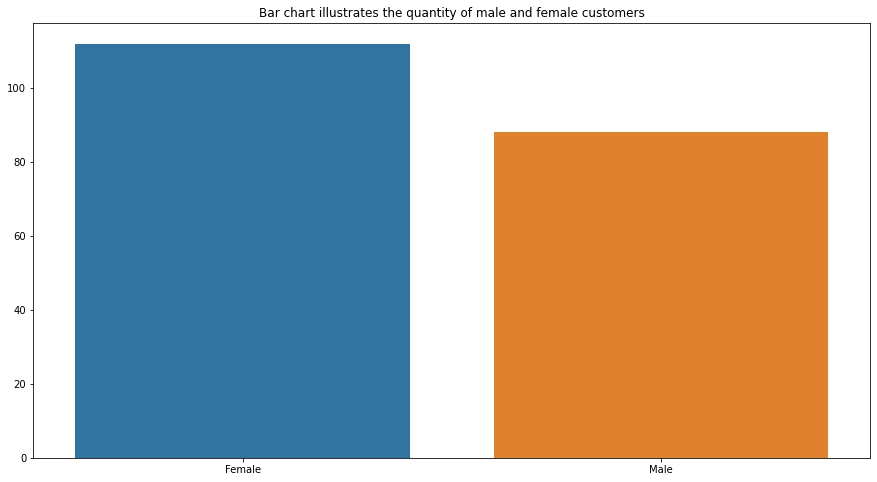

In [9]:
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x=df.Gender.value_counts().index, y=df.Gender.value_counts().values,ax=ax)
ax.set_title('Bar chart illustrates the quantity of male and female customers')
plt.show()

- We see no gender balance in this data, the female population clearly outweighs the male counterpart.

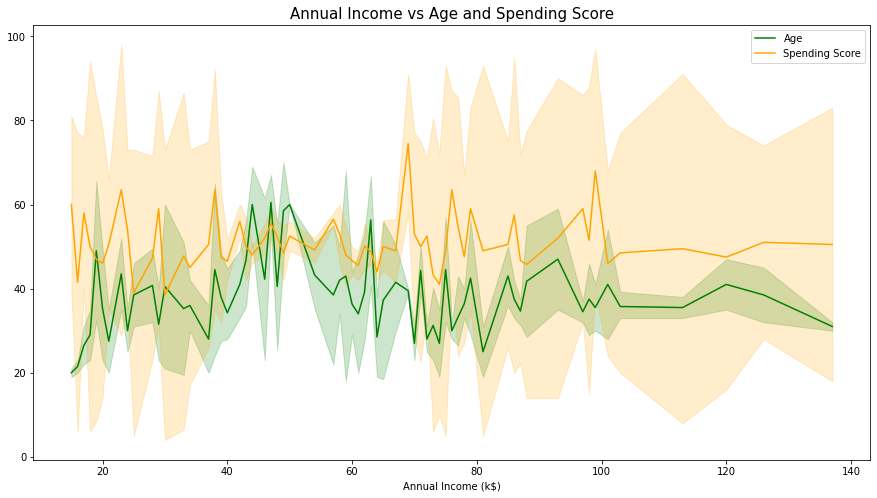

In [10]:
fig, ax = plt.subplots(figsize=(15,8))

sns.lineplot(x='Annual Income (k$)',y='Age',data=df, color = 'green', label='Age',ax=ax)
sns.lineplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df, color = 'orange',label='Spending Score',ax=ax)
ax.set_title('Annual Income vs Age and Spending Score', fontsize = 15)

ax.set_ylabel('')

ax.legend()
plt.show()

The above plot between Annual Income and Age represented by a green color line, and a plot between Annual Income and the Spending Score represented by a orange color, shows how Age and Spending Varies with Annual Income.

Text(0.5, 1.0, 'Correlation Factors Heat Map')

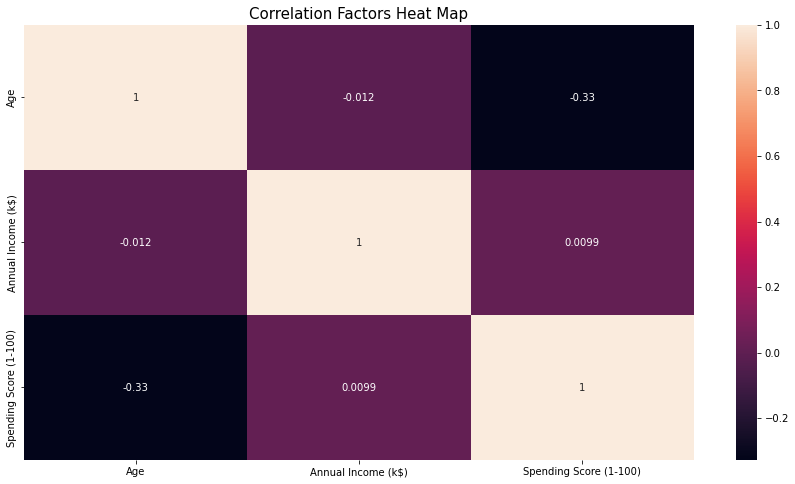

In [11]:
## Correlation coeffecients heatmap
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(), annot=True,ax=ax).set_title('Correlation Factors Heat Map', size='15')

The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.

We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

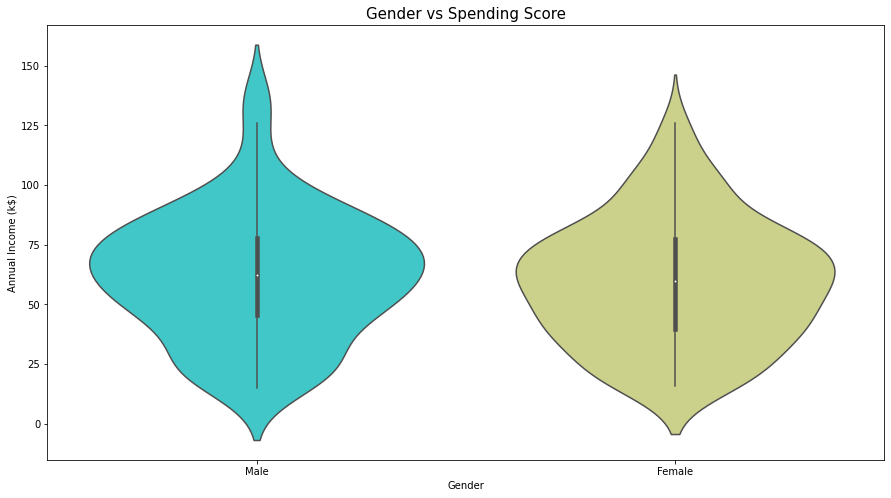

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data=df, palette = 'rainbow',ax=ax)
ax.set_title('Gender vs Spending Score', fontsize = 15)
plt.show()

There are more quantity of males who get paid than females. But, The number of males and females are equal in number when it comes to low annual income.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# CLUSTERING ANALYSIS

## Kmeans Algorithm

In [13]:
from sklearn.cluster import KMeans

The Elbow Method to find the No. of Optimal Clusters

In [14]:
x = df.iloc[:,[1,2,3]].values
x.shape

(200, 3)

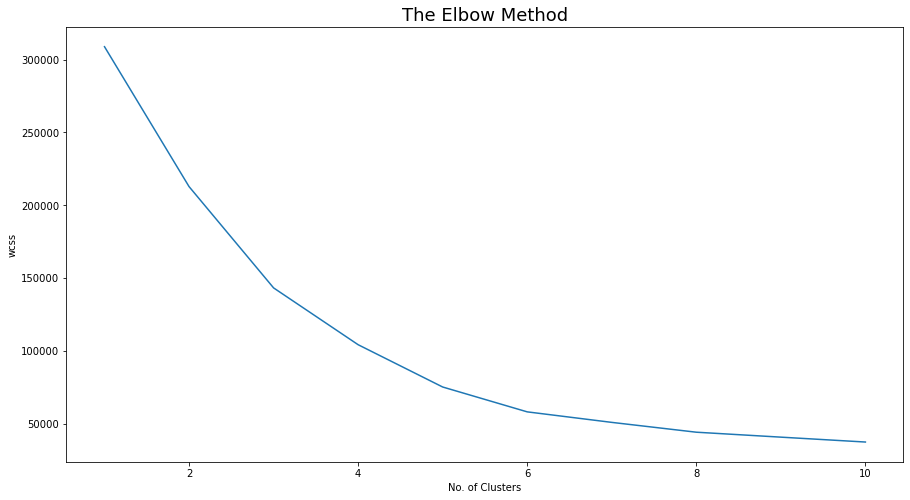

In [15]:
wcss = [] 
#(Within-Cluster Sum of Square)-sum of squared distance
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

fig, ax=plt.subplots(figsize=(15,8)) 
ax.plot(range(1, 11), wcss)
ax.set_title('The Elbow Method', fontsize = 18)
ax.set_xlabel('No. of Clusters')
ax.set_ylabel('wcss')
plt.show()

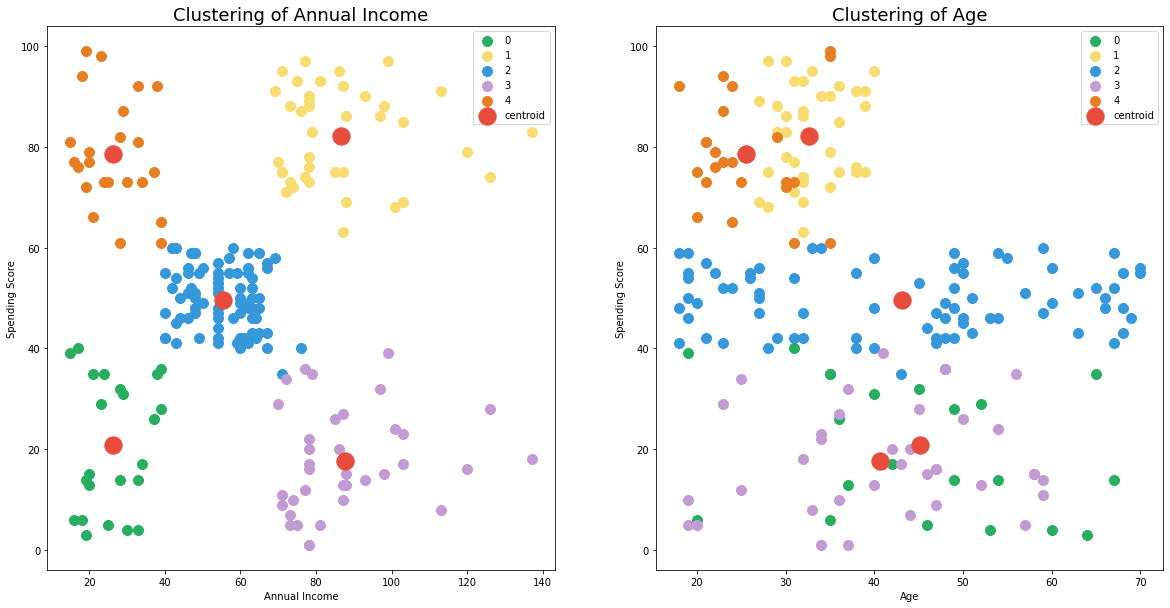

In [16]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

ax1.scatter(x[y_means == 0, 1], x[y_means == 0, 2], s = 100, c = '#27AE60', label = '0')
ax1.scatter(x[y_means == 1, 1], x[y_means == 1, 2], s = 100, c = '#F7DC6F', label = '1')
ax1.scatter(x[y_means == 2, 1], x[y_means == 2, 2], s = 100, c = '#3498DB', label = '2')
ax1.scatter(x[y_means == 3, 1], x[y_means == 3, 2], s = 100, c = '#C39BD3', label = '3')
ax1.scatter(x[y_means == 4, 1], x[y_means == 4, 2], s = 100, c = '#E67E22', label = '4')
ax1.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:, 2], s = 300, c = '#E74C3C' , label = 'centroid')

ax2.scatter(x[y_means == 0, 0], x[y_means == 0, 2], s = 100, c = '#27AE60', label = '0')
ax2.scatter(x[y_means == 1, 0], x[y_means == 1, 2], s = 100, c = '#F7DC6F', label = '1')
ax2.scatter(x[y_means == 2, 0], x[y_means == 2, 2], s = 100, c = '#3498DB', label = '2')
ax2.scatter(x[y_means == 3, 0], x[y_means == 3, 2], s = 100, c = '#C39BD3', label = '3')
ax2.scatter(x[y_means == 4, 0], x[y_means == 4, 2], s = 100, c = '#E67E22', label = '4')
ax2.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 2], s = 300, c = '#E74C3C' , label = 'centroid')


ax1.set_title('Clustering of Annual Income', fontsize = 18)
ax1.set_xlabel('Annual Income')
ax1.set_ylabel('Spending Score')
ax1.legend()

ax2.set_title('Clustering of Age', fontsize = 18)
ax2.set_xlabel('Age')
ax2.set_ylabel('Spending Score')
ax2.legend()

plt.show()

This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. 
- There are clearly Five segments of Customers namely
    + 0: Careful Customers.
    + 1: Target Customers.
    + 2: General Customers.
    + 3: Miser Customers.
    + 4: Squandered Customers.
    
based on their Age, Annual Income and Spending Score which are reportedly the best factors to determine the segments of a customer in a Mall.


Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.

## Agglomerative Hierarchical Clustering Algorithm

Encoding:

In [17]:
gender = {'Gender': {'Male':0, 'Female':1}}
df1 = df.replace(gender)
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


Normalize:

In [18]:
from sklearn.preprocessing import normalize
df_scaled = normalize(df1)
df_scaled = pd.DataFrame(df_scaled, columns=df1.columns)
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.413925,0.326783,0.849635
1,0.000000,0.247025,0.176446,0.952809
2,0.037987,0.759737,0.607790,0.227921
3,0.012203,0.280676,0.195253,0.939653
4,0.018728,0.580581,0.318383,0.749137


Draw the dendrogram:

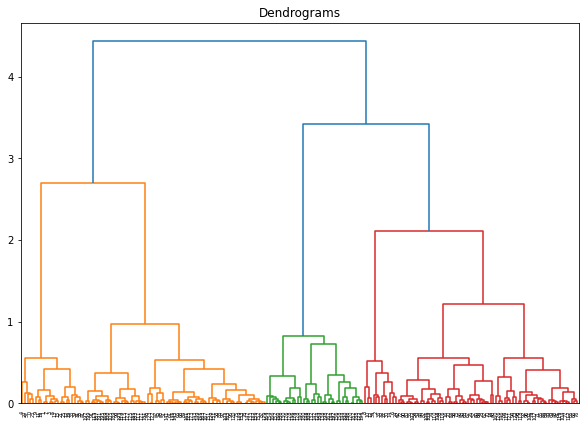

In [19]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))

The vertical line with maximum distance is the blue line and hence we can decide a threshold of 3 and cut the dendrogram

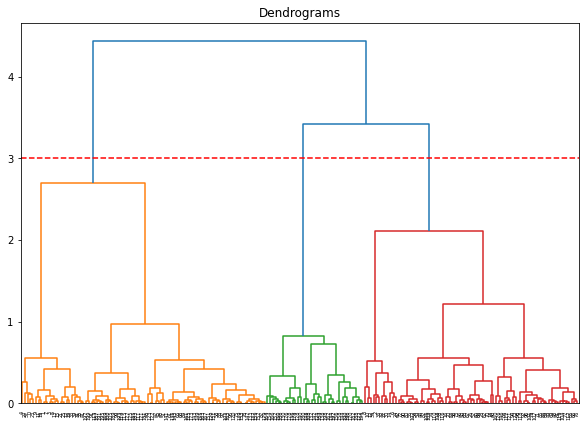

In [20]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=3, color='r', linestyle='--')

We have three clusters as this line cuts the dendrogram at three points. Let’s now apply hierarchical clustering for 3 clusters:

In [21]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_scaled)

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

We can see the values of 0s, 1s and 2s in the output since we defined 3 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster, 2 represents points in the third cluster. Let’s now visualize the three clusters:

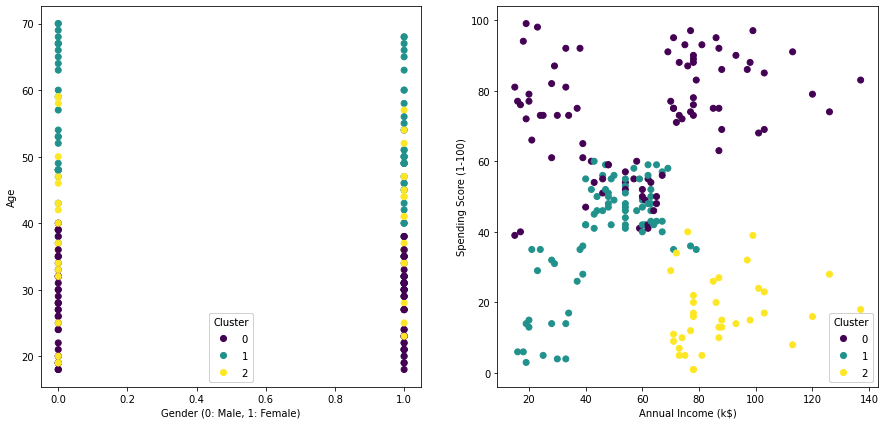

In [22]:
fig, (axes) = plt.subplots(1,2,figsize=(15,7))

scatter1 = axes[0].scatter('Gender', 'Age', data = df1,c= cluster.labels_)
scatter2 = axes[1].scatter('Annual Income (k$)', 'Spending Score (1-100)', data = df1,c= cluster.labels_)

axes[0].set_xlabel("Gender (0: Male, 1: Female)")
axes[0].set_ylabel("Age")

axes[1].set_xlabel("Annual Income (k$)")
axes[1].set_ylabel("Spending Score (1-100)")

legend1 = axes[0].legend(*scatter1.legend_elements(), title="Cluster")
legend2 = axes[1].legend(*scatter2.legend_elements(), title="Cluster")
axes[0].add_artist(legend1)
axes[1].add_artist(legend2)

plt.show()

All clusters are almost equally distributed in both Gender groups (Male, Femail)

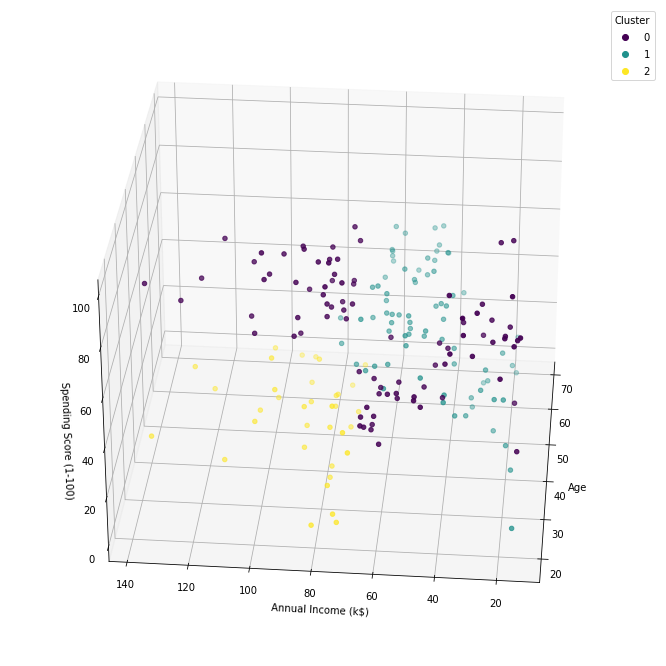

In [23]:
fig = plt.figure(figsize=(30,12))
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(xs= df1["Age"], ys= df1["Annual Income (k$)"], zs= df1["Spending Score (1-100)"], c= cluster.labels_ )
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
legend = ax.legend(*sc.legend_elements(), title="Cluster")
plt.show()

- From three charts above, we can see Hierarchical Clustering algorithm generated the following 3 clusters:
    + Cluster 0: Age < 40, Spending Score >= 40
    + Cluster 1: Age >= 40, Spending Score <= 60, Annual Income <= 80
    + Cluster 2: Spending Score <= 40, Annual Income > 60

## DBSCAN algorithm

In [24]:
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.metrics import silhouette_score

- DBSCAN algorithm has two parameter:
    
    -Eps: the radius of the vicinity
    
    -MinPts: number of objects/points at least in neighboring Eps of an object
- So that we have to investigate for the best values for them

In [25]:
X_numerics = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
eps_values = np.arange(1.5,15,0.5) # eps values to be investigated
min_samples = np.arange(2,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    try:
        tmp = silhouette_score(X_numerics, DBS_clustering.labels_)
    except:
        pass
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(tmp)

- To evaluate the **eps_value** and **min_sample**, we will use [**Silhouette score**](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c).

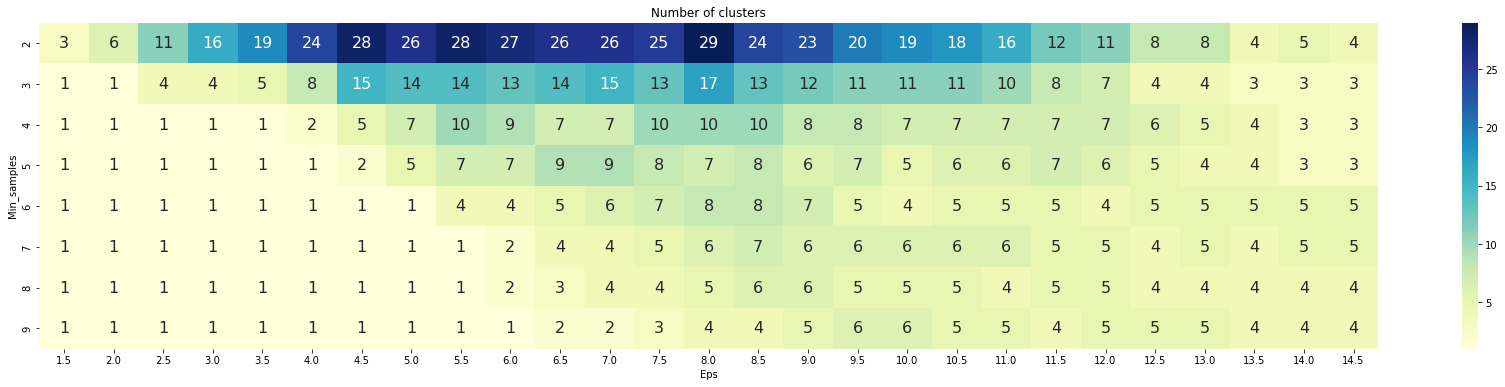

In [26]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(30,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

**silhouette** score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

    + 1: Means clusters are well apart from each other and clearly distinguished.
    + 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
    + -1: Means clusters are assigned in the wrong way.


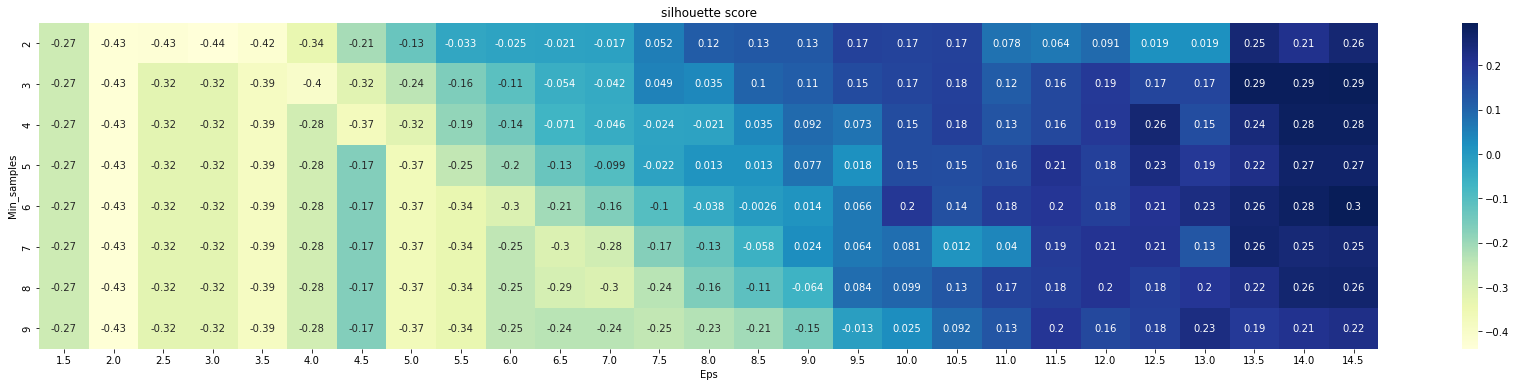

In [27]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(30,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
ax.set_title('silhouette score')
plt.show()

As you can see, with **Min_samples** = 6 and **Eps** = 14.5 give us the best sihoutte score = 0.3 so we will use this result for DBSCAN algorithm.

In [28]:
DBS_clustering = DBSCAN(eps=14.5, min_samples=6).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ 

In [29]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,17
0,113
1,8
2,35
3,27


With those parametere, DBSCAN created 4 classes plus outliers cluster (-1). Next we will plot these data with new labels of clustering.

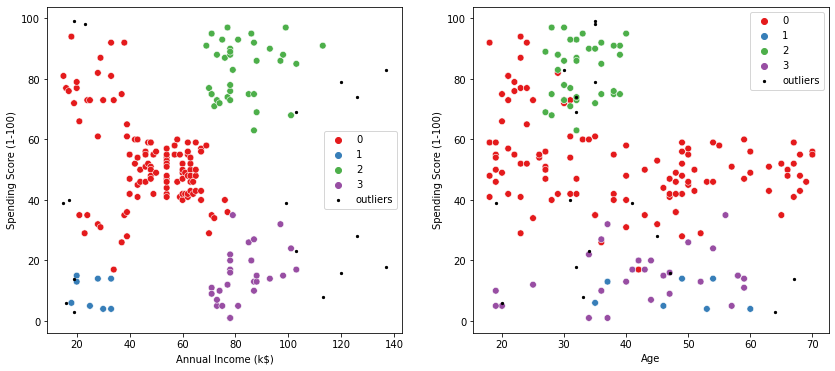

In [30]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(14,6))


sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

- DBScan algorithm generated the following 4 clusters:

    + Class 0: clients of all ages with medium-high spending score and medium-low annual income

    + Class 1: Middle-age (35 - 60) clients with low spending score and low annual income

    + class 2: Younger clients (25 - 40) with high spending score and medium annual income
    
    + class 3: Below 60 years old with low spending score and medium annual income